In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

dataFrame = pd.read_excel("merc.xlsx")

In [117]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


### Veriyi anlama:

In [118]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### Boş veri var mı?

In [119]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

### Fiyatlara göre yoğunluk grafiği:

C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\2640715678.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(x=dataFrame["price"])


<AxesSubplot:ylabel='Density'>

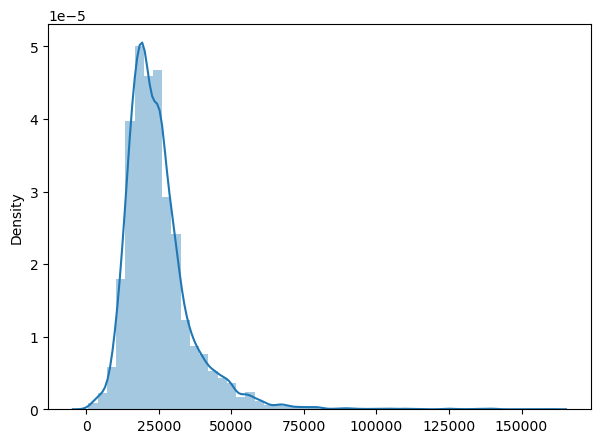

In [120]:
plt.figure(figsize=(7,5))
sbn.distplot(x=dataFrame["price"])

### Yıllara göre veri sayısı:

<AxesSubplot:xlabel='year', ylabel='count'>

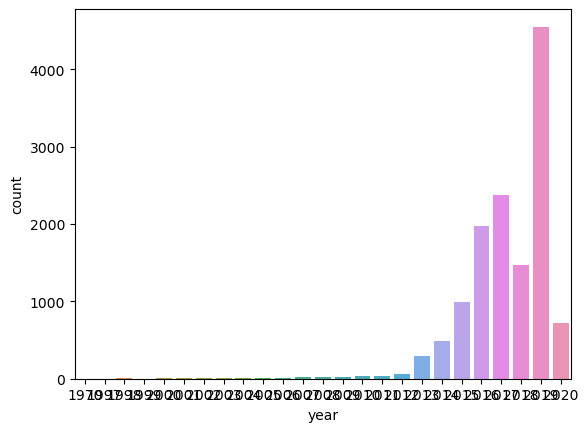

In [121]:
sbn.countplot(x=dataFrame["year"])

### Korelasyon:

In [122]:
dataFrame.corr()

C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\3497904997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


### Fiyat için korelasyon:

In [123]:

dataFrame.corr()["price"].sort_values()

C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\1425451737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

### Kilometre-Fiyat nokta grafiği:

<AxesSubplot:xlabel='mileage', ylabel='price'>

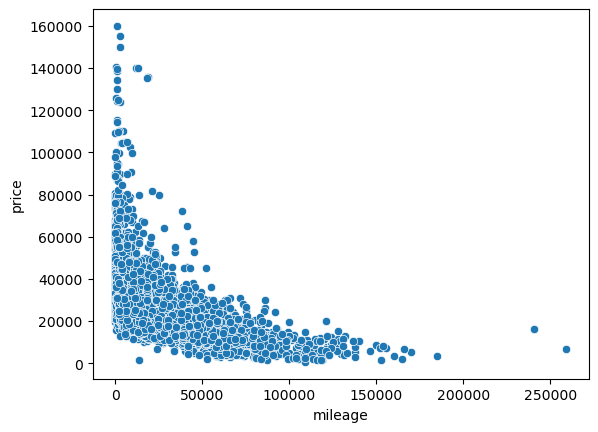

In [124]:

sbn.scatterplot(x="mileage", y="price", data = dataFrame)

In [125]:

dataFrame.sort_values("price", ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


### Modelin kalitesini arttırmak için az sayıda bulunan aşırı yüksek fiyatlı araçları silmeliyiz.

In [126]:
len(dataFrame)

13119

In [127]:
len(dataFrame)*0.01

131.19

### En yüksek fiyatlı 131 aracı eliyoruz.

In [128]:

filteredDf = dataFrame.sort_values("price", ascending=False).iloc[131:]
filteredDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\4240242523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(filteredDf["price"])


<AxesSubplot:xlabel='price', ylabel='Density'>

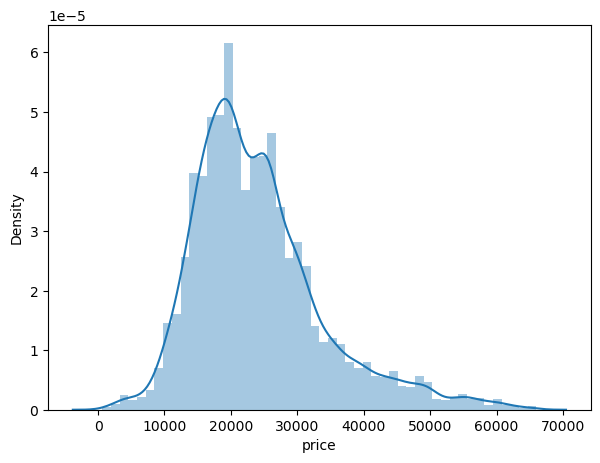

In [129]:

plt.figure(figsize=(7,5))
sbn.distplot(filteredDf["price"])

### Yeni fiyatlara göre yoğunluk grafiği. Aşırı fiyatlı arabaları elediğimiz için grafik daha verimli görünüyor.

In [130]:

dataFrame.groupby("year").mean()["price"]

C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\2386141480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

### 1970 yılındaki pahalı araç modelin kalitesini düşürebileceğinden onu da eliyoruz.

In [131]:
dataFrame = filteredDf

dataFrame = dataFrame[dataFrame.year != 1970]

dataFrame.groupby("year").mean()["price"]

C:\Users\Candaş\AppData\Local\Temp\ipykernel_13936\2194367487.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [132]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


### Vites verisi sayısal olmadığı için transmission sütununu kaldırmalıyız.

In [133]:
dataFrame = dataFrame.drop("transmission", axis=1)

### Çıkış yani fiyat verilerini y değişkenine atıyoruz:

In [134]:
y = dataFrame["price"].values

### Fiyat sütununu eleyip geri kalan giriş verilerini x değişkenine atıyoruz:

In [135]:
x = dataFrame.drop("price", axis=1).values

In [136]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [137]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [138]:
from sklearn.model_selection import train_test_split

### Verileri test payı %30 olacak şekilde bölüyoruz:

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [140]:
len(x_train)

9090

In [141]:
len(x_test)

3897

### Eğitim verilerimiz üzerinde öğrenme süreci gerçekleştiriyoruz ve eğitim verileriyle test verilerini 0-1 aralığında değerlere dönüştürüyoruz.

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [144]:
x_train.shape

(9090, 5)

### Bir model oluşturuyoruz, 5 katman ekliyoruz ve modelimizi eğitim için hazırlıyoruz:

In [145]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 672144576.0000 - val_loss: 688102464.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672119552.0000 - val_loss: 688052672.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672016000.0000 - val_loss: 687855488.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671635264.0000 - val_loss: 687165952.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 670404672.0000 - val_loss: 685089920.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 667041152.0000 - val_loss: 679790848.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 659163904.0000 - val_loss: 668302848.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 643334272.0000 - val_loss: 646445248.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6149788

37/37 [==============================] - 0s 2ms/step - loss: 23023982.0000 - val_loss: 23996026.0000
Epoch 144/300
37/37 [==============================] - 0s 2ms/step - loss: 22904258.0000 - val_loss: 23917784.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 22764392.0000 - val_loss: 23763732.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 22648638.0000 - val_loss: 23660648.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 22533528.0000 - val_loss: 23600542.0000
Epoch 148/300
37/37 [==============================] - 0s 2ms/step - loss: 22428464.0000 - val_loss: 23475070.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 22331916.0000 - val_loss: 23416310.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 22226440.0000 - val_loss: 23310934.0000
Epoch 151/300
37/37 [==============================] - 0s 3ms/step - loss: 22191590.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 19018530.0000 - val_loss: 20421412.0000
Epoch 286/300
37/37 [==============================] - 0s 3ms/step - loss: 18941090.0000 - val_loss: 20414874.0000
Epoch 287/300
37/37 [==============================] - 0s 3ms/step - loss: 18932506.0000 - val_loss: 20423424.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 18932834.0000 - val_loss: 20360834.0000
Epoch 289/300
37/37 [==============================] - 0s 3ms/step - loss: 18923274.0000 - val_loss: 20383702.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 18932336.0000 - val_loss: 20346380.0000
Epoch 291/300
37/37 [==============================] - 0s 3ms/step - loss: 18925084.0000 - val_loss: 20332050.0000
Epoch 292/300
37/37 [==============================] - 0s 3ms/step - loss: 18894582.0000 - val_loss: 20321340.0000
Epoch 293/300
37/37 [==============================] - 0s 3ms/step - loss: 18883226.0000 - val

### Kayıp verilerini inceliyoruz:

In [146]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.head()

,loss,val_loss
0,672144576.0,688102464.0
1,672119552.0,688052672.0
2,672016000.0,687855488.0
3,671635264.0,687165952.0
4,670404672.0,685089920.0


### loss ve val_loss izleme grafiği (val_loss, loss'a göre yükselmeye başlarsa overfitting olabilir):

<AxesSubplot:>

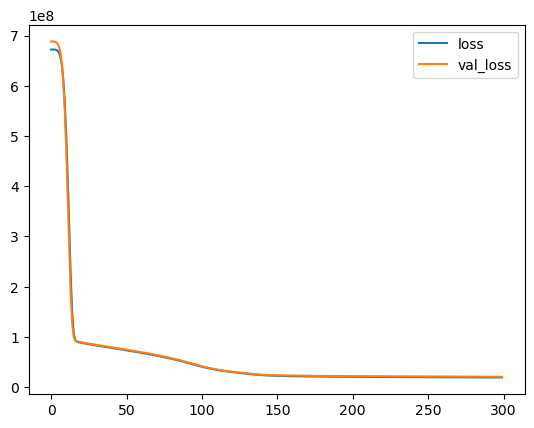

In [147]:
kayipVerisi.plot()

### Test verilerini kullanarak modelimize tahmin yaptırıyoruz:

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
tahminDizisi = model.predict(x_test)
tahminDizisi

122/122 [==============================] - 0s 951us/step


array([[22481.367],
       [23364.703],
       [25242.172],
       ...,
       [26523.54 ],
       [12601.962],
       [24982.338]], dtype=float32)

### Modelin tahmin ettiği veriler ile gerçek veriler arasındaki mutlak hata payını hesaplatıyoruz:

In [167]:
hataPayi = mean_absolute_error(y_test, tahminDizisi)
hataPayi

3198.3488159179688

In [165]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


### Hata payı yaklaşık %13 olarak hesaplandı:

In [175]:
print("Hata payı ≈ %" + str(int(hataPayi / dataFrame.describe().iloc[1,1] * 100)))

Hata payı ≈ %13


### Tahmin verileri ile gerçek veriler arasındaki ilişkiyi nokta bulutu grafiğinde görselleştiriyoruz (noktalar çizgi şekline yaklaştıkça hata payı azalır):

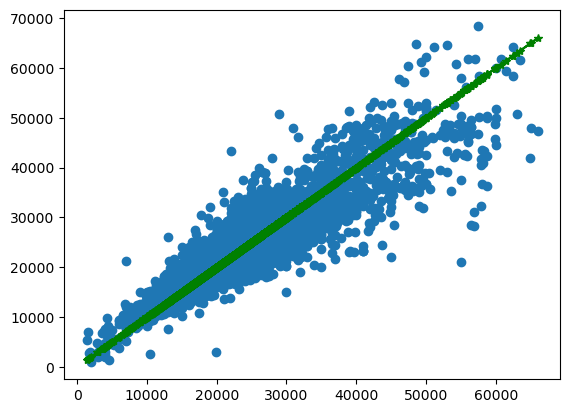

In [151]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

### Verisetimizdeki 2 indexli araba verisini kullanarak tahmin yaptıralım:

In [152]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

### Modelimize fiyat tahmini yaptıracağımız için 2 indexli verimizden price sütununu kaldırıyoruz ve verilerimizi ölçeklendiriyoruz:

In [181]:
yeniArabaSeries = dataFrame.drop("price", axis=1).iloc[2]

yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [182]:
type(yeniArabaSeries)

pandas.core.series.Series

In [183]:
yeniArabaSeries = scaler. transform(yeniArabaSeries.values.reshape(-1,5))

### Ölçeklendirilmiş verilerle modelimize tahmin yaptırıyoruz:

In [184]:
tahminDizisi2 = model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 17ms/step


###
### Tahmin verisi ile gerçek veriyi karşılaştırıyoruz.
### Modelin tahmin ettiği fiyat 62676 iken gerçek fiyat 65980.
### Hata oranı %5:

In [188]:
print("Tahmin edilen fiyat:", tahminDizisi2[0,0])
print("Gerçek fiyat:", dataFrame.iloc[2,1])
hataPayi2 = dataFrame.iloc[2,1]-tahminDizisi2[0,0]
print("Hata payı:", hataPayi2)
print("Hata oranı ≈ %" + str(int(hataPayi2/dataFrame.iloc[2,1]*100)))

Tahmin edilen fiyat: 62676.58
Gerçek fiyat: 65980
Hata payı: 3303.421875
Hata oranı ≈ %5
